<a href="https://colab.research.google.com/github/david7franco/PS4CS/blob/main/Project_PS4CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#makes the code look nice !
%config InlineBackend.figure_format='retina'

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [81]:
# Input data files are available in the read-only... imported from Kaggle.
# Instead of using Kaggle API, I downloaded and imported file to my google drive


from google.colab import drive 

drive.mount('/content/drive')

stats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTPS4CS/PlayerStatsPremierLeague.csv')

stats.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
8,Shkodran Mustafi,20.0,Arsenal,Defender,Germany,28.0,99,52,26,7,...,NaN,NaN,NaN,NaN,NaN,NaN,28,0,117,7.0
9,Calum Chambers,21.0,Arsenal,Defender,England,25.0,139,47,57,6,...,NaN,NaN,NaN,NaN,NaN,NaN,28,1,137,2.0


The code below was just a simple way to view a team by group, so all the chelsea players will be seen.

In [82]:
#This code block functions as a way to group Chelsea's teammates together. 

team = (stats.groupby('Club'))
chelsea = team.get_group('Chelsea')
chelsea.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
115,Kepa Arrizabalaga,1.0,Chelsea,Goalkeeper,Spain,25.0,71,39,20,0,...,16.0,33.0,9.0,22.0,320.0,473.0,2,0,0,NaN
116,Willy Caballero,13.0,Chelsea,Goalkeeper,Argentina,38.0,33,19,5,0,...,15.0,20.0,5.0,16.0,132.0,166.0,0,0,0,NaN
117,Antonio Rüdiger,2.0,Chelsea,Defender,Germany,27.0,80,45,21,5,...,NaN,NaN,NaN,NaN,NaN,NaN,14,0,73,3.0
118,Marcos Alonso,3.0,Chelsea,Defender,Spain,29.0,140,87,32,20,...,NaN,NaN,NaN,NaN,NaN,NaN,25,1,125,16.0
119,Andreas Christensen,4.0,Chelsea,Defender,Denmark,24.0,59,29,18,0,...,NaN,NaN,NaN,NaN,NaN,NaN,6,1,35,1.0


A team I have some interest in (not really but) is Chelsea, so I thought to group and see who has scored the most goals on their *current* team


These next three graphs show are nominal data, using the categorical positions goals and player names for this specific graph below.

I arrange nominal variables in a list from bottom to top which means their bars are horizontal.

<ipython-input-83-4d9f5bd8fe4d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Players')

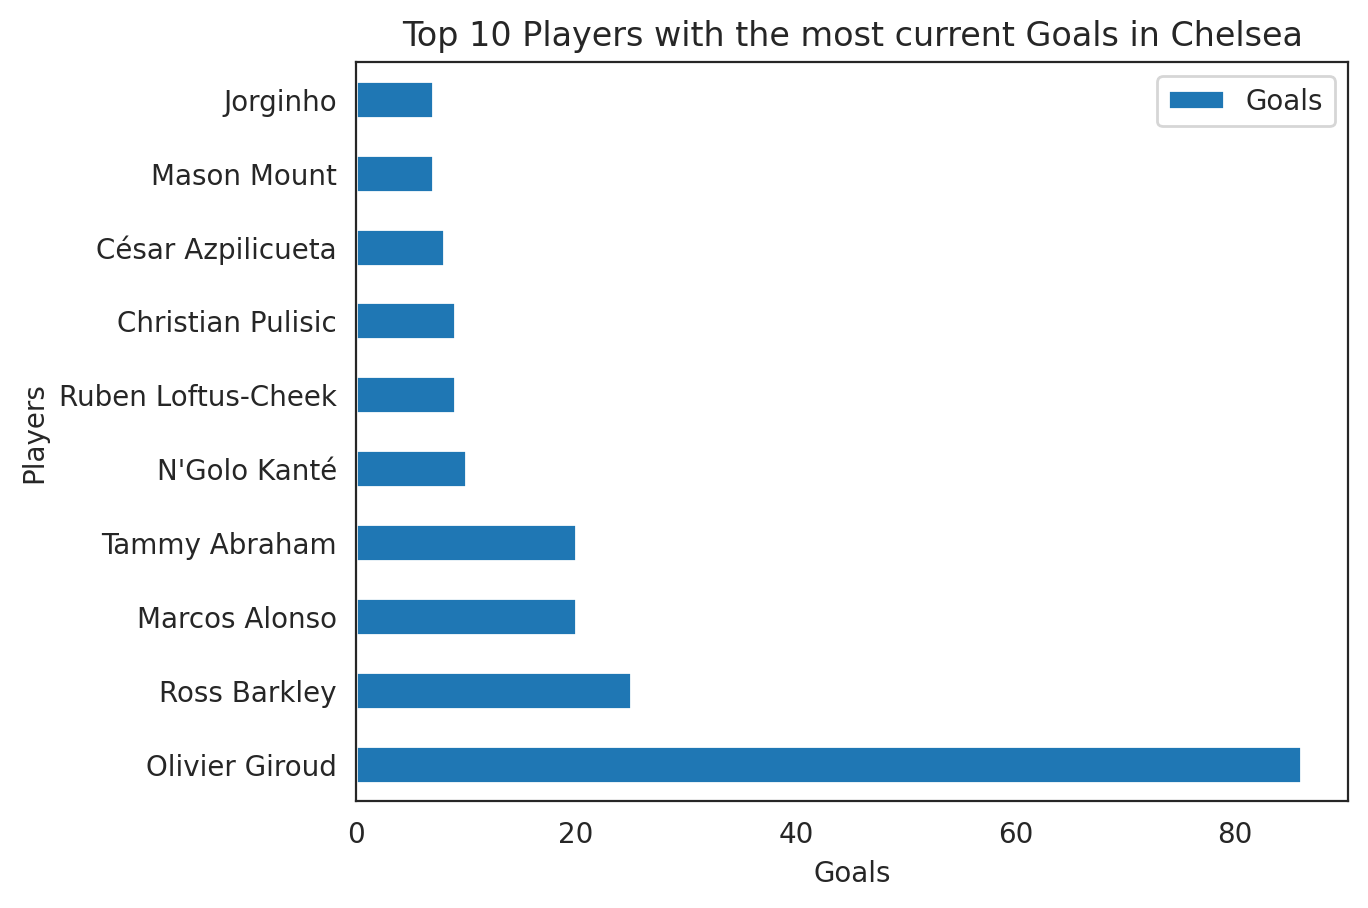

In [83]:


#Pie charts and bar graphs are used for qualitative data. I mainly focused on qualitiative data, as I feel that is what best represents most 
# of the datatyoes for this dataset.


chelsea['Goals'] = chelsea['Goals'].astype('int') 

#ax = plt.figure(figsize=(10,10))
chel = chelsea.sort_values('Goals',ascending=False).head(10)
ax = chel.plot(kind='barh',x='Name', y='Goals',title = 'Top 10 Players with the most current Goals in Chelsea')
ax.set_xlabel("Goals")
ax.set_ylabel("Players")

Same thing but with Manchester City. I wanted to expierement with Different players and differnet club. 



<ipython-input-84-425eb43500a5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Players')

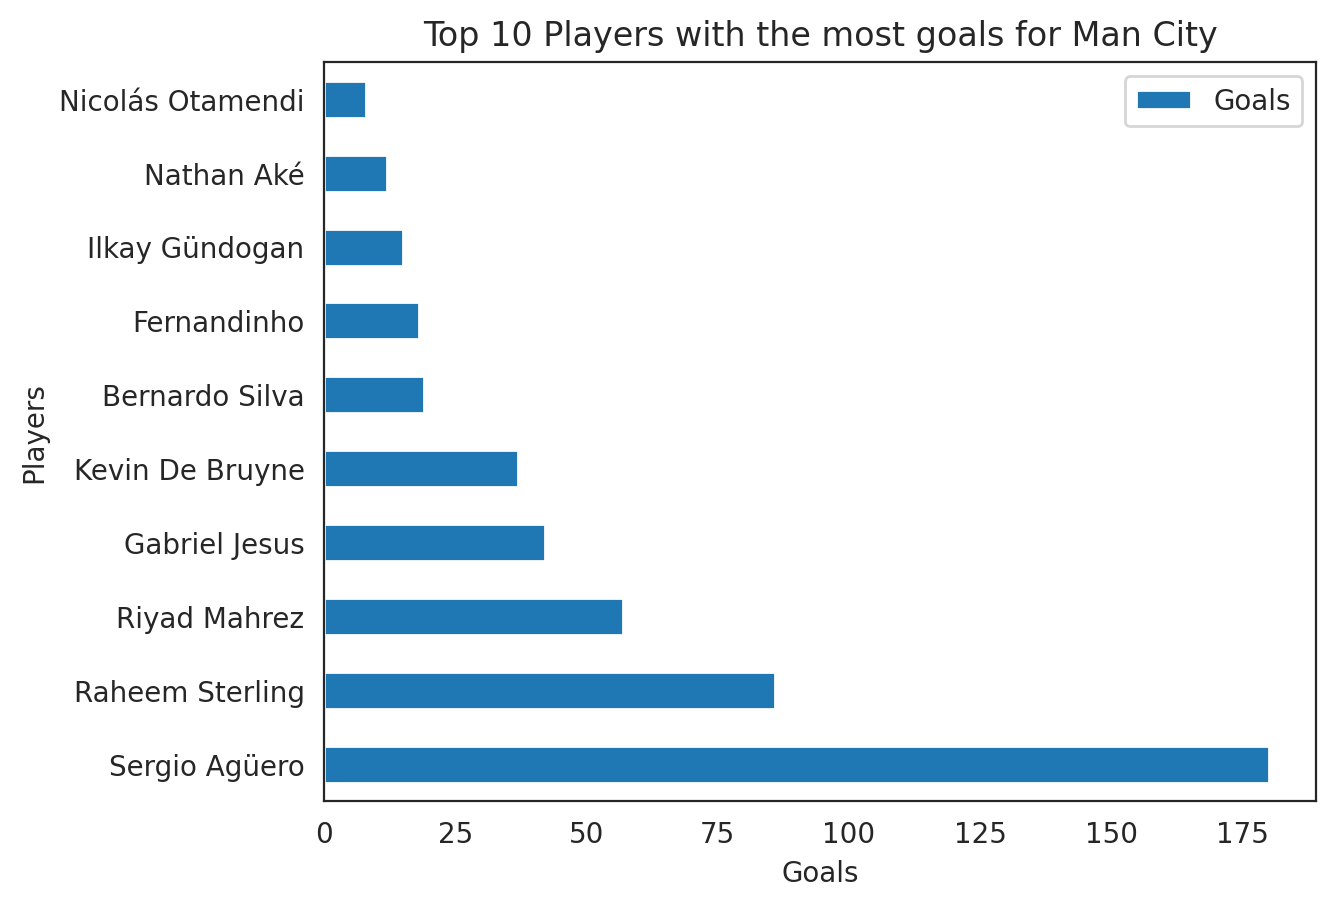

In [84]:
#same thing but with Manchester City. 

team = (stats.groupby('Club'))


man_city = team.get_group('Manchester-City')
man_city.head()

man_city['Goals'] = man_city['Goals'].astype('int') 

city_goals = man_city.sort_values('Goals',ascending=False).head(10)
ax = city_goals.plot(kind='barh',x='Name', y='Goals',title = 'Top 10 Players with the most goals for Man City')
ax.set_xlabel("Goals")
ax.set_ylabel("Players")

This code is shows the top 10 english goal scorers, using .loc as we did in class. I had created a var named nationality, and assigened it to get the nationality be england, and then created a graph based on the goals and that shows the top 10 english goalscorers (current from 2020)

<Figure size 1000x3000 with 0 Axes>

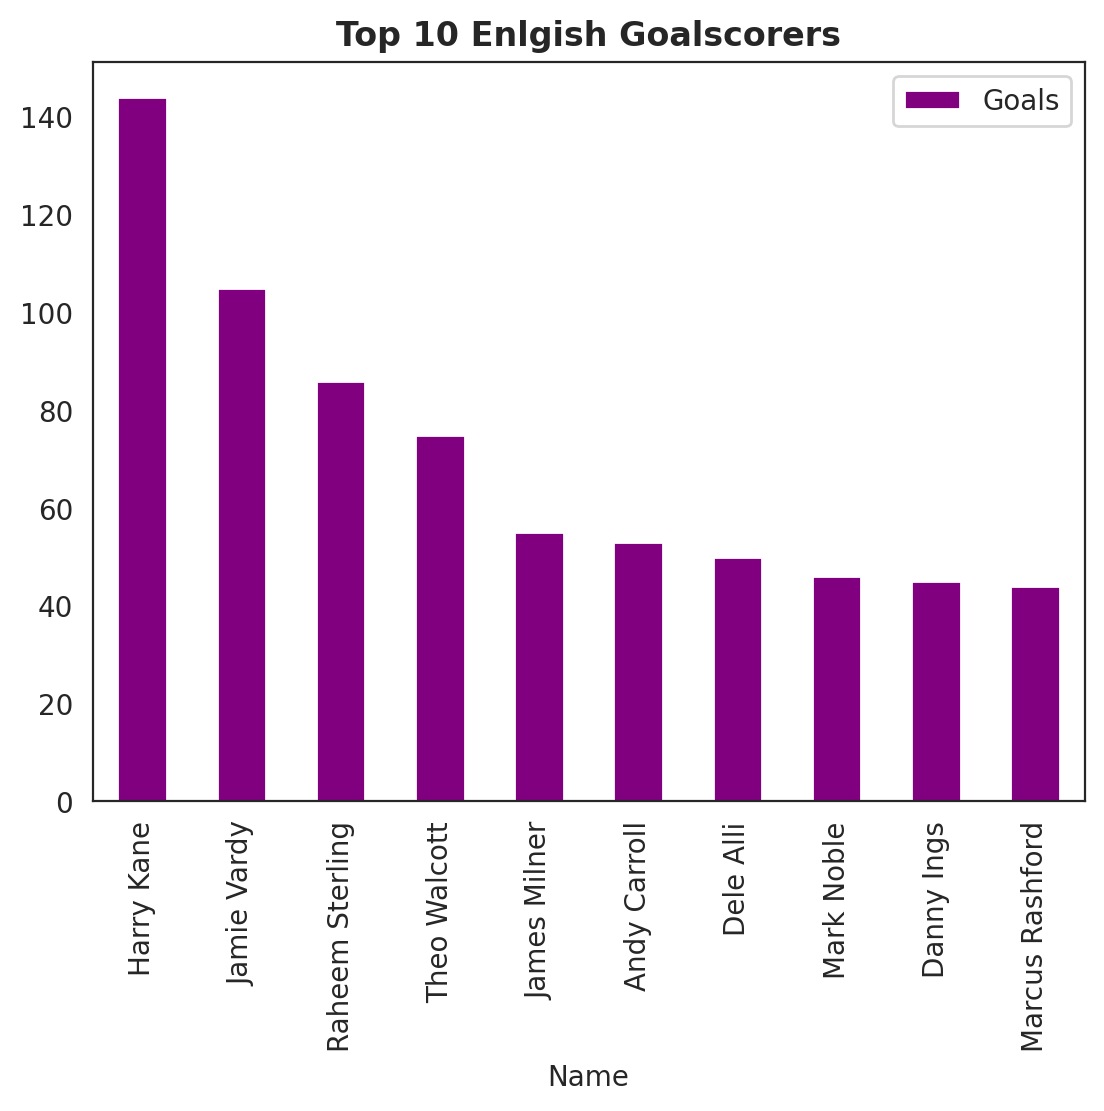

In [85]:
#this shows the Top 10 current english goalscorers that are currnetly playing.

nationality = stats.loc[stats['Nationality'] == 'England']
nationality

eng = nationality[['Name','Goals']]


allGoals = eng.sort_values('Goals',ascending=False).head(10)
ax = plt.figure(figsize=(10,30))

ax = allGoals.plot(kind='bar', x='Name',y='Goals', color = 'Purple')
ax.set_title('Top 10 Enlgish Goalscorers',weight= 'bold')
plt.show()



Originally, I wanted to show all the countries, but stuck with top 10 as all countries in the Premier leage was getting very messy and hard to clean up. 


This pie graph shows how England makes 53% of the total nationality in the Premier league. This shows nominal data, as datatype age is a number.

I created a list to grab the first 10 lables form the index of appearances, as i was getting errors trying to just do a normal for loop to get the first 10 indices of apperances. Using that list, was able to now label appearances. before i was not able to since they were not the same length. 

for the explode variable, I had to look up how to do this, but this "explodes" the highest pie slice to show who the greatest nationality of players is, which is of course, england. 

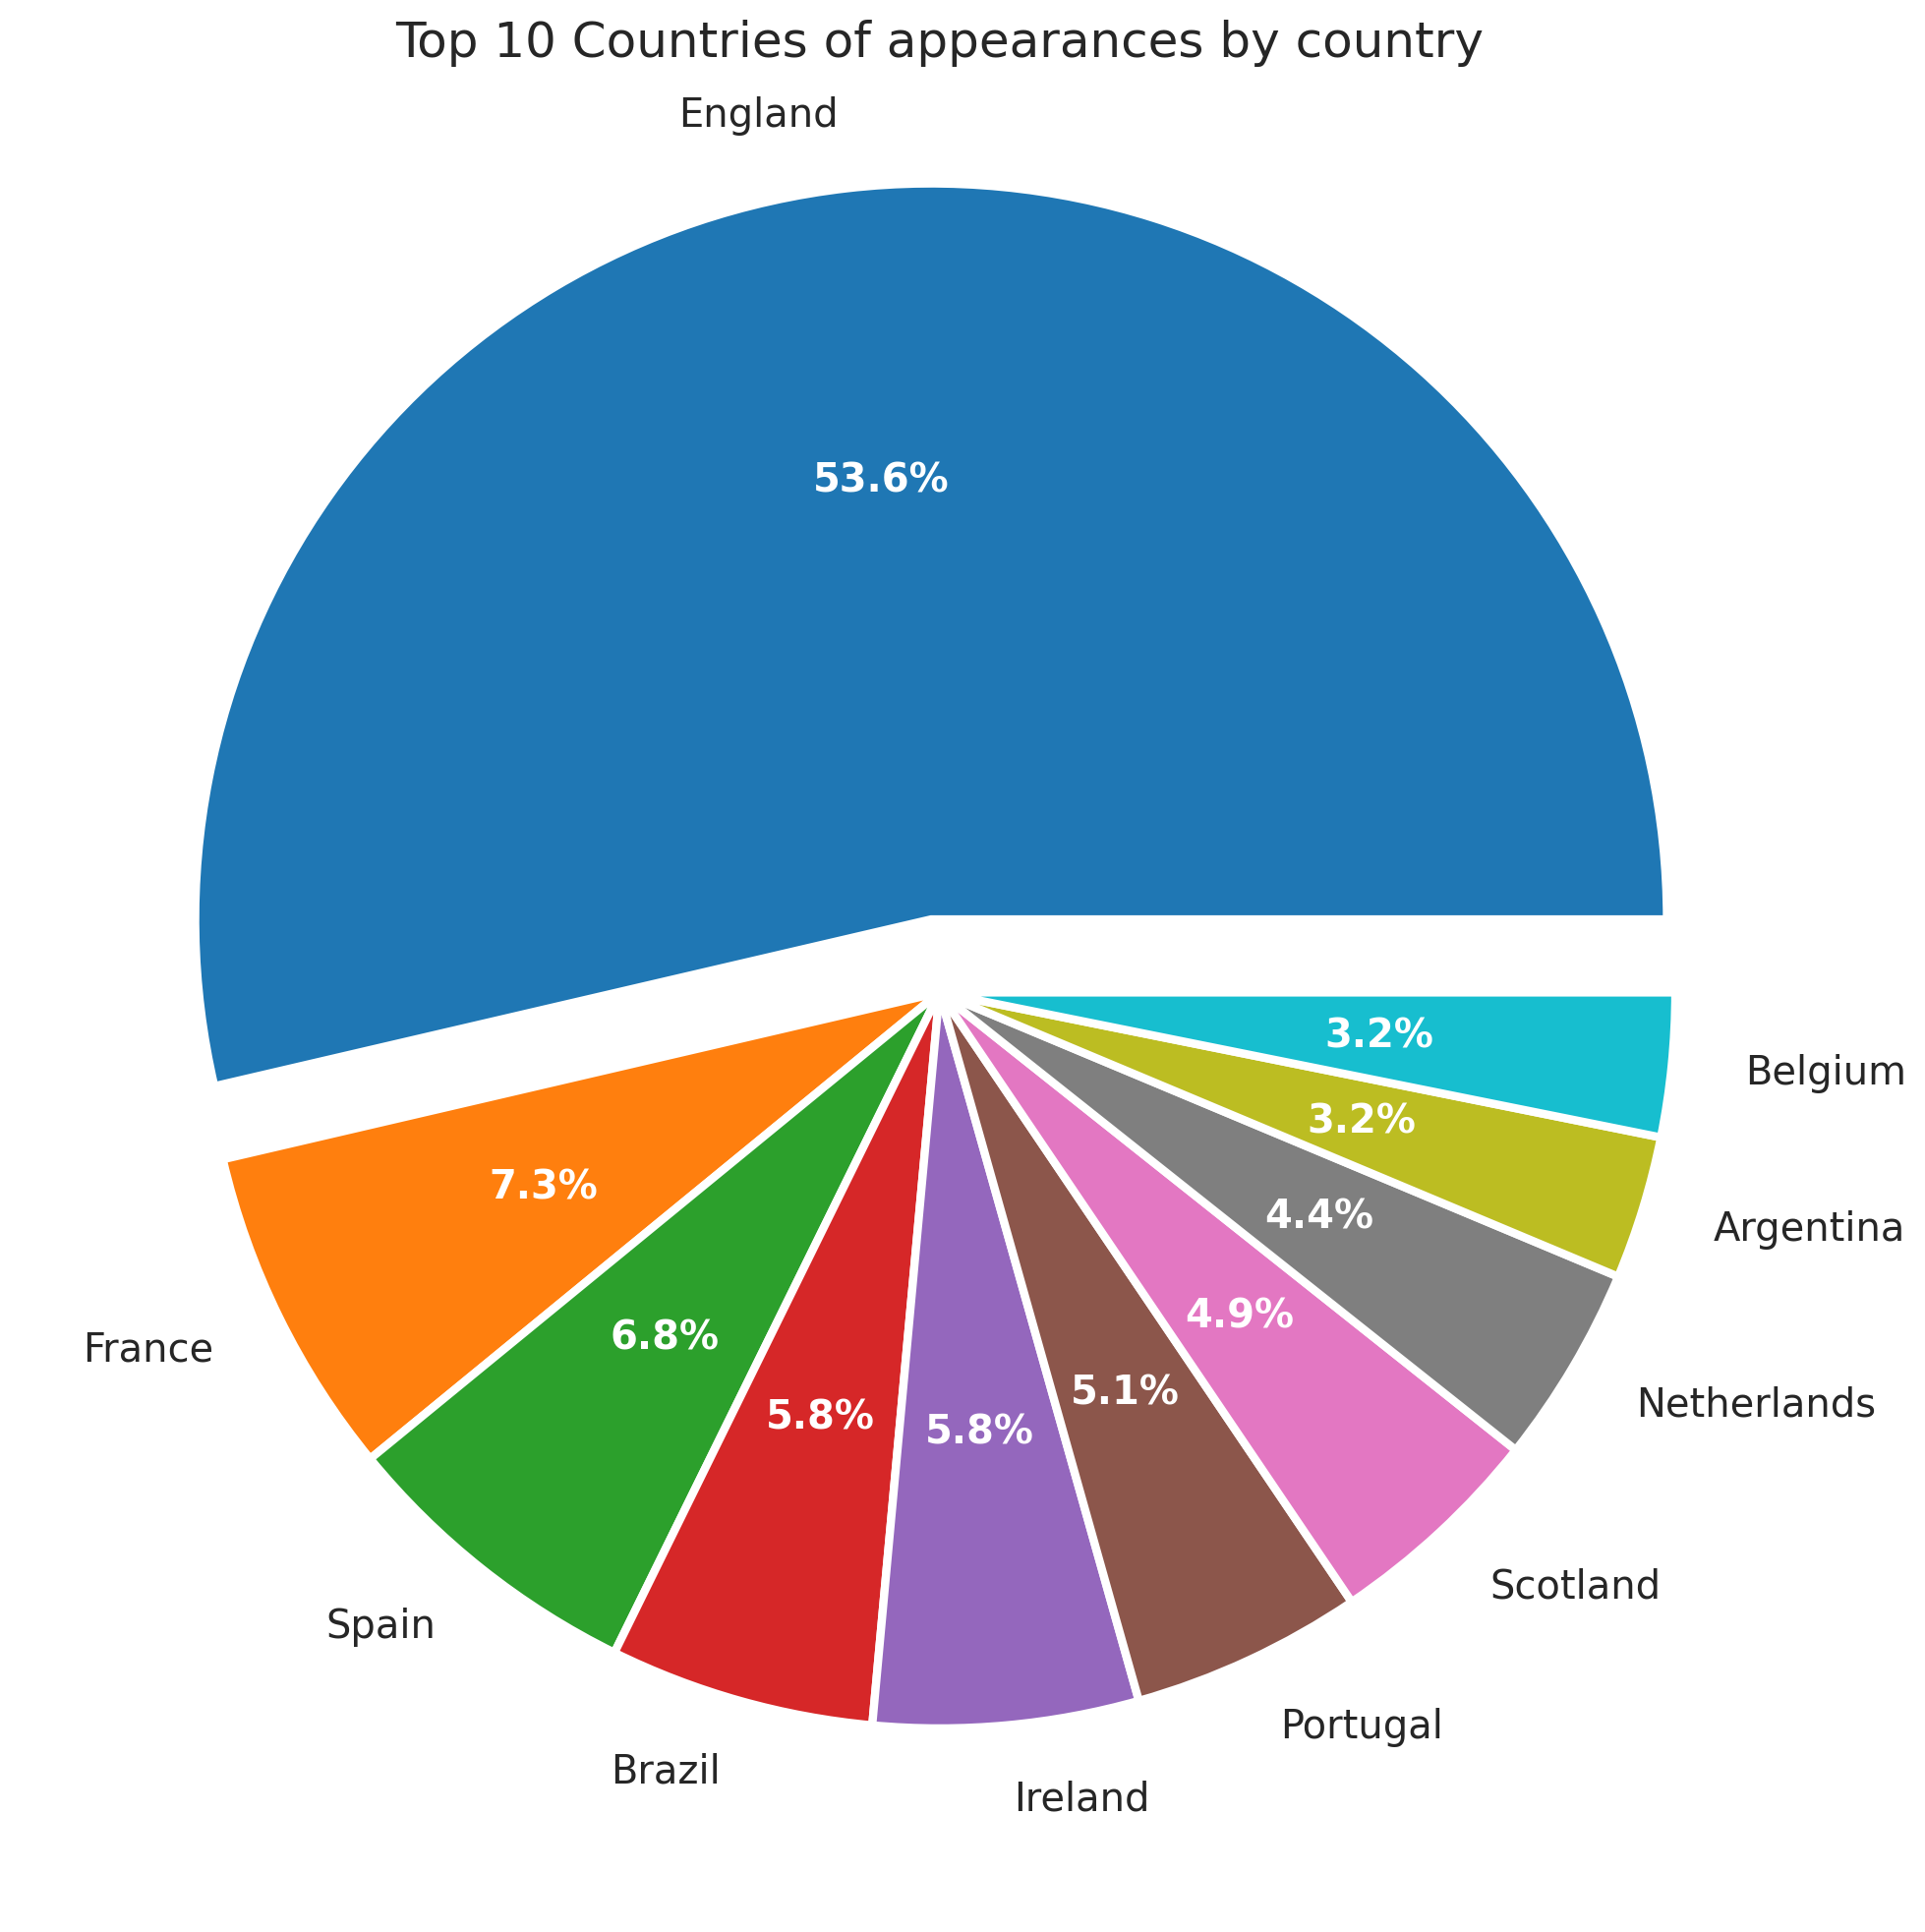

In [86]:
#Pie charts and bar graphs are used for qualitative data.

fig, ax = plt.subplots(figsize=(10, 10))
appearances = stats['Nationality'].value_counts()

labels = appearances.index.tolist()

# grab the first 10 percentage points
num_points = 10
labels_first_10 = appearances.index[:num_points].tolist()


percentages = appearances[:num_points]/appearances.sum()*100

# get the labels and explode array for the first 10 points
labels = labels[:num_points]
explode = [0.1 if i == 0 else 0 for i in range(num_points)]

patches, texts, pcts = ax.pie(appearances[:num_points], 
       autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
       labels = labels_first_10,
       explode=explode)

plt.setp(pcts, color='white', fontweight='bold')
ax.set_title(f'Top 10 Countries of appearances by country', fontsize=18)
plt.tight_layout()


Quantitative data is data that can be counted or measured in numerical values.

I want to show a mean age for All the premier league club teams. This simple chart is using seaborn to plot all Premier league teams mean age distribution.

Leeds united has the most young players, while Crystal Palace has the most old players.

While reading documentation, I used the set_style() function to use some neatness and readability, and I added a cool pallete called "Dark2" to change the colors of the plot. 

I used a mean age to as there are no outliers or significant age distribution.

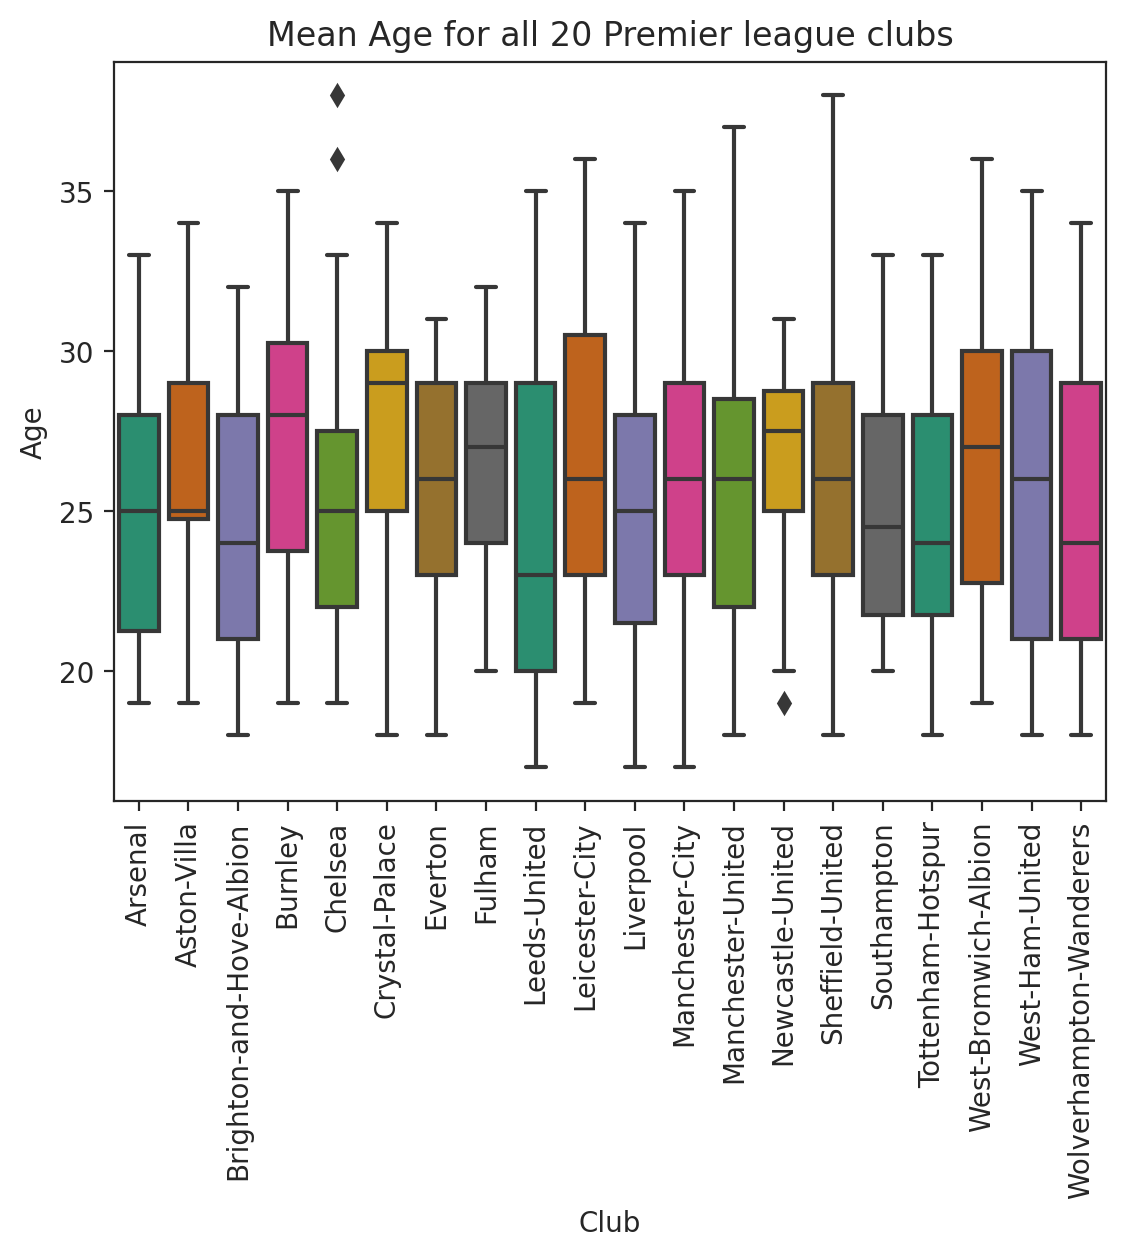

In [87]:

# Create a boxplot of the median ages for each team


sns.set_style('ticks', {'xtick.major.size': 10, 'ytick.major.size': 10})
sns.boxplot(data = stats, x = 'Club', y = 'Age', palette= "Dark2")
plt.xticks(rotation = 90)
plt.title("Mean Age for all 20 Premier league clubs")
plt.show()



Our next graph will be another box plot showing numerical data.

In this, I am going to show the mean Yellow cards per each team in the Premier League. 

The graph below shows all the active players median yellow cards. A few notes, there are some outliers, which would indicate that there are teammates with high yellow card coutns, which could potentially be by being on the team for a long time, or they managed to rack up a lot of yellow cards really quick.

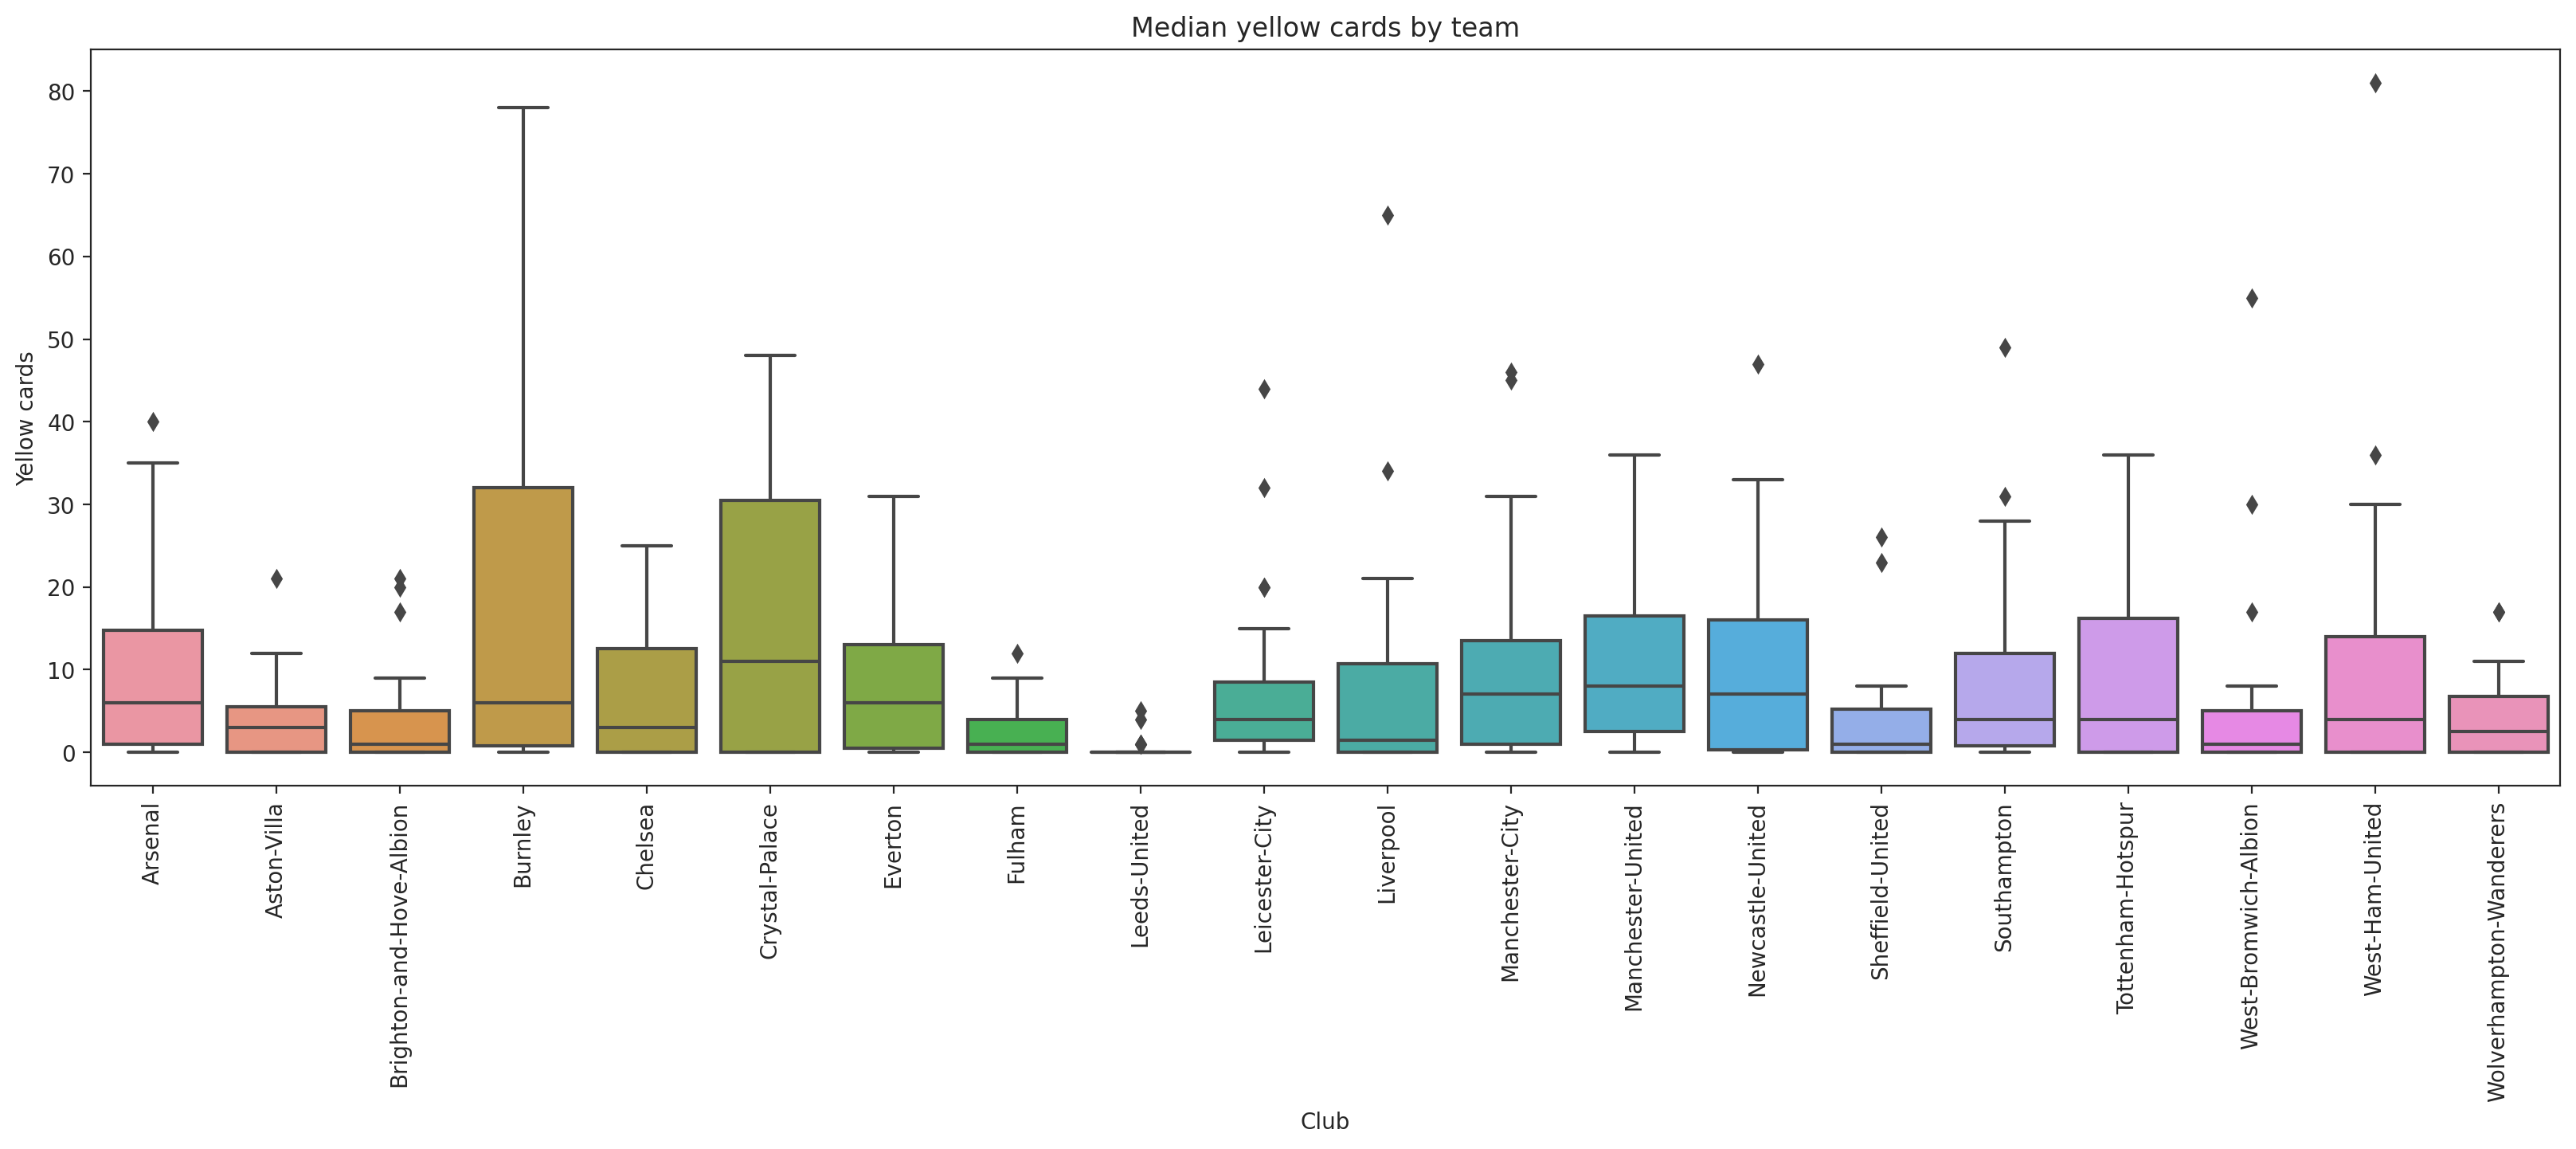

In [88]:

plt.figure(figsize=(20,6))

c = sns.boxplot(data=stats, x='Club', y='Yellow cards' )
sns.set_style('ticks', {'xtick.major.size': 10, 'ytick.major.size': 10})
plt.xticks(rotation = 90)
plt.title("Median yellow cards by team")
plt.show()

This graph shows the Std Deviation of fouls commited per team in the Premier League. 

The standard deviation of fouls represents how much the number of fouls committed by each player on a team vary from the average number of fouls committed by all players on that team. 


A high standard deviation of fouls for a particular team could indicate that some players on the team commit a much larger number of fouls compared to the average, while others commit very few fouls. A low standard deviation, on the other hand, would indicate that the number of fouls committed by each player on the team is relatively similar and close to the team average.

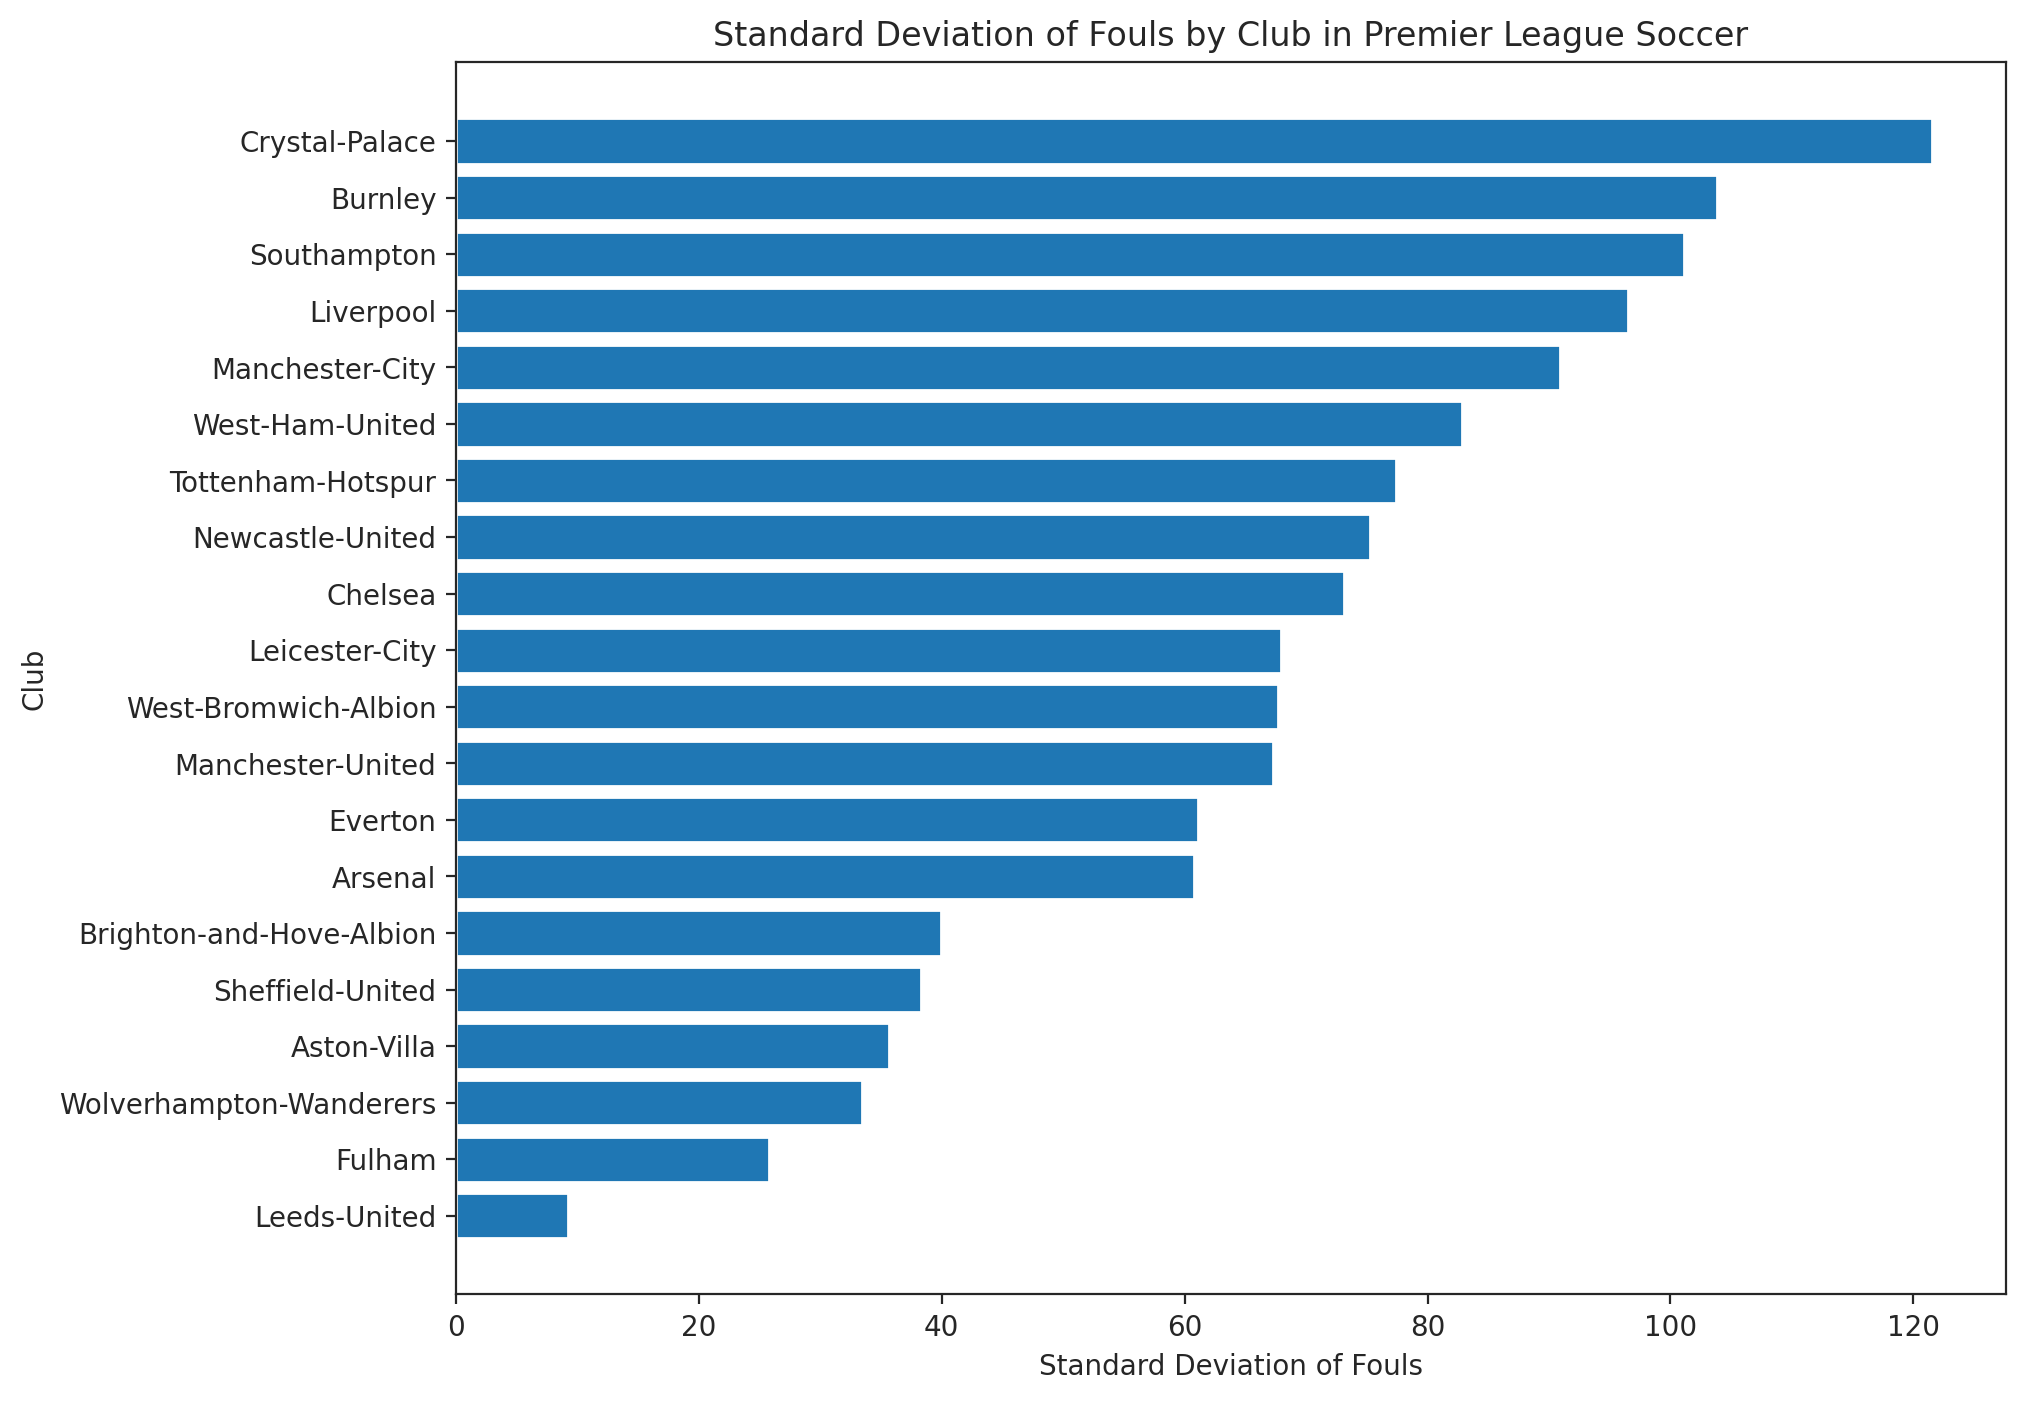

In [89]:
# Group the data by club and calculate the standard deviation of fouls
grouped = stats.groupby('Club')['Fouls'].std().sort_values(ascending=True)

# Create a horizontal bar chart of the standard deviation of fouls for each club
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(grouped.index, grouped.values)
ax.set_xlabel('Standard Deviation of Fouls')
ax.set_ylabel('Club')
ax.set_title('Standard Deviation of Fouls by Club in Premier League Soccer')

plt.show()


This graph is a bell curve of the Age distribution among the Premier league and its players. 

Bell graphs typically show normal distribution, with my example below showing the standard age distribution.

Using the mean and std deviation, I was able to get the probability density, using norm.pdf() function, where mean is n, std dev is m, and x would be the age range.

This graph shows that there is a high amount of players around ages 25, leading off at around age 30, and the youngest being around 17-18 years old.

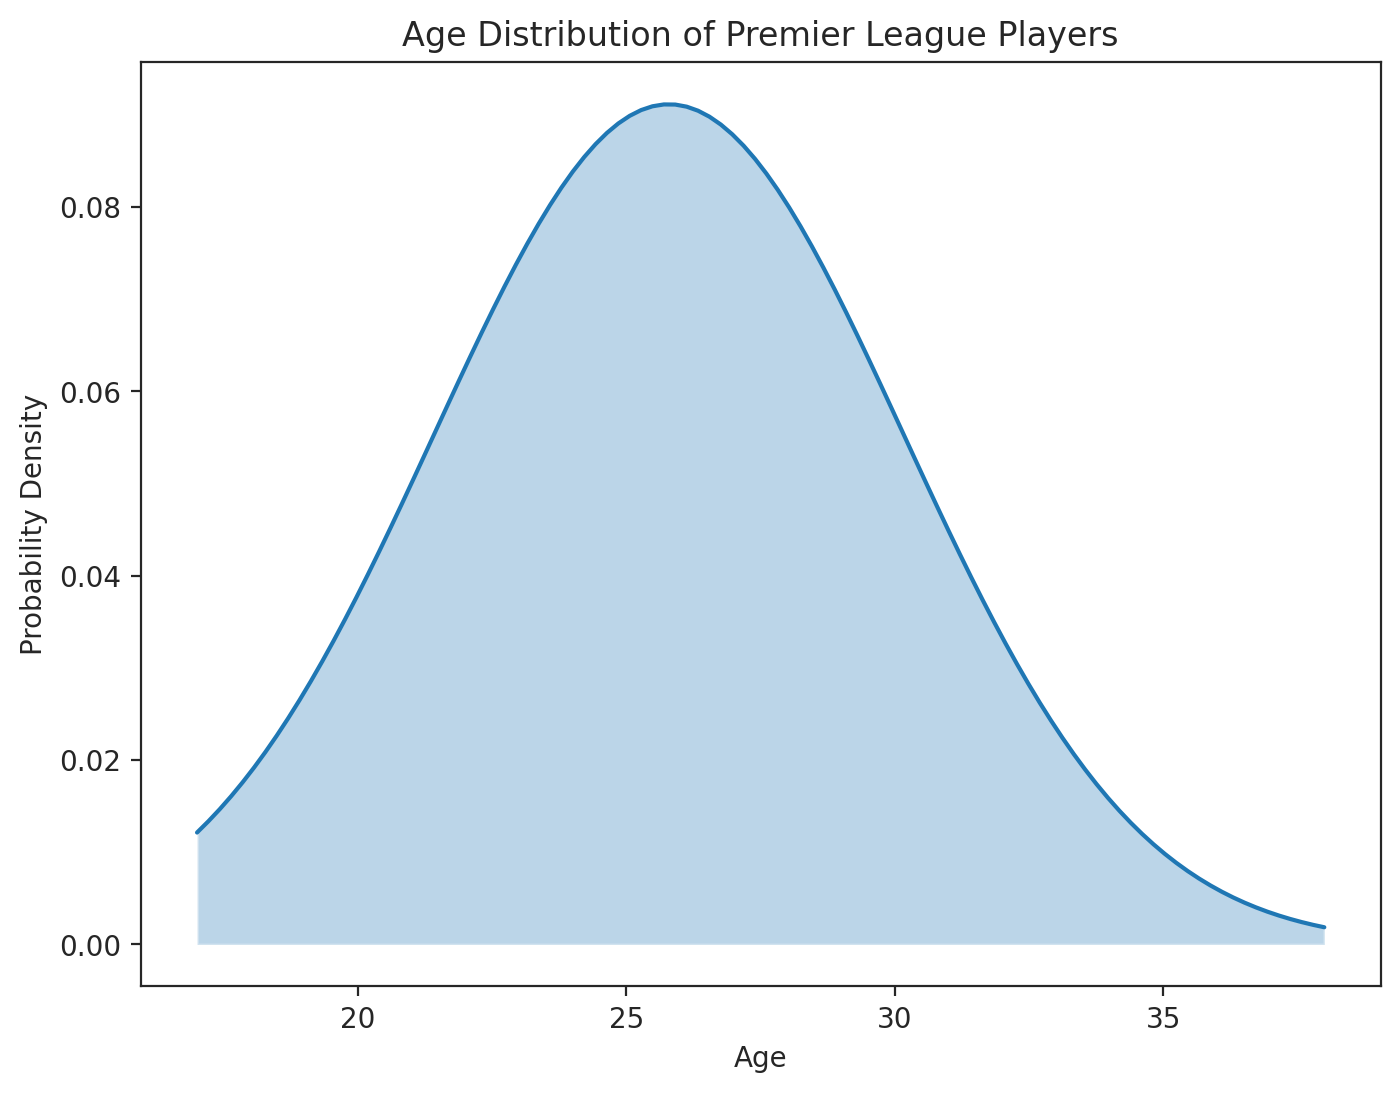

In [90]:


# mean of age is n
# std dev of age is m
#x = age range?


# We Calculate the mean and standard deviation of player ages

age_range = np.linspace(stats['Age'].min(), stats['Age'].max(), 100)
age_mean = stats['Age'].mean()
age_std = stats['Age'].std()


#All the plotting for the bell curve.
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(age_range, norm.pdf(age_range, age_mean,age_std))
ax.fill_between(age_range, norm.pdf(age_range, age_mean,age_std), 0, alpha=.3)
ax.set_title('Age Distribution of Premier League Players')
ax.set_xlabel('Age')
ax.set_ylabel('Probability Density')

plt.show()

I thought a density plot would be interesting way to show age distribution across the Premier League that isnt like the graph above. This shows the ages distributed by density scaled from 0-100 (age range), instead of probability density. 

I thought it was interesting to view to see how sample standard deviation and normal standard deviation differes when comparing density graphs. 

<Figure size 1500x800 with 0 Axes>

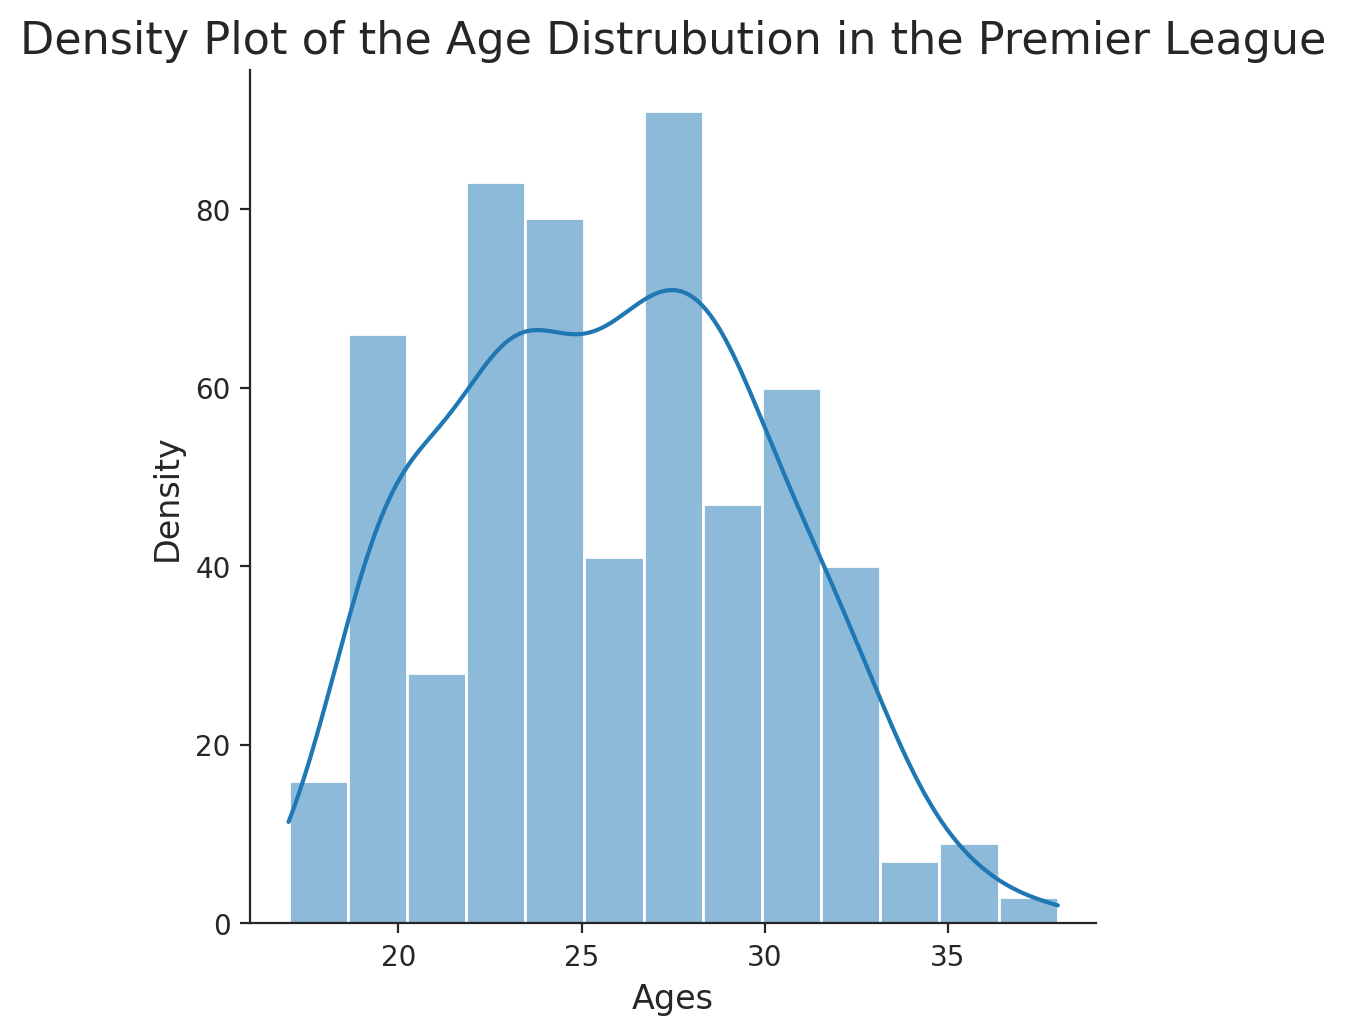

In [91]:
plt.figure(figsize=(15, 8))
sns.displot(stats['Age'],kde=True)

plt.xlabel("Ages", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title("Density Plot of the Age Distrubution in the Premier League", fontsize=16)
plt.show()